In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os
import copy
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import albumentations as A
from runpy import run_path

from decompose_compose.pipeline import *
from utils.results_visualization import save_results

warnings.filterwarnings("ignore")

[Taichi] version 1.7.0, llvm 15.0.4, commit 2fd24490, linux, python 3.11.7


[I 02/04/24 19:35:35.013 46998] [shell.py:_shell_pop_print@23] Graphical python shell detected, using wrapped sys.stdout
/home/jovyan/Projects/tmp/test/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
import random
import torch

In [4]:
def reset_random(seed=0):
    random.seed(seed)
    torch.manual_seed(seed)
    np.random.seed(seed)

reset_random()

# Default usage from configuration file

In [5]:
default_feature_sampler_limitations = {
    'class_type': {
        'ne': 0
    },
    'main_diag_height': {
        'ge': 20
    },
    'main_diag_width': {
        'ge': 20
    }
}

In [6]:
default_config = {
        "device": "cpu",
        "composition_mode": "modification",
        "blending_mode": "base",
        "object_prefix": "plant_",
        "dataset_names": [
            "Wild Edible Plants"
        ],
        "result_sizes": [
            [640, 640]
        ],
        "force_repreparation": False,
        "augmentations_config_path": "./configs/augmentation_config.py",
        "background_generation": {
            "storage_path": "./tmp_data/background_storage/",
            "requires_model": True,
            "samples_per_dataset": 3
        },
        "sampling": {
            "num_objects_per_image": "random_from_data",
            "object_schema_mode": "random_from_data",
            "max_parts_per_object": 15
        },
        "object_placement": "random"
    }

In [7]:
part_type2num = run_path('./metadata/metadata.py')['object_type']

# Изменение объекта аугментаций

Обратите внимаение, что в данном ноутбуке параметры аугментаций потобраны слишком сильными для демонстрационных целей. При практическом использовании целесообразно уменьшать магнитуды и вероятности трансформаций.

CoarseDropout - вырезание нескольких прямоугольных участков.

Используется здесь как основной демонстрационный пример, потому что применение данной трансформации наиболее заметно визуально.

Применение ко всем частям объека

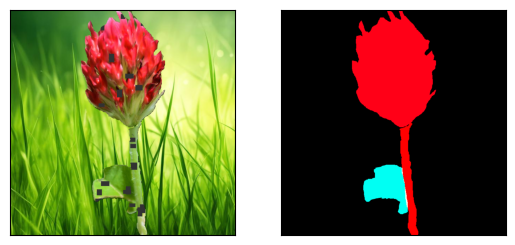

In [8]:
new_config = copy.deepcopy(default_config)
new_config['augmentations_config_path'] = './configs/augmentation_config_strong.py'

pipeline = Pipeline(
    project_config=new_config,
    feature_sampler_limitations=default_feature_sampler_limitations,
    verbose=0
)

pipeline.augmentor.augmentation_config['aug_list'] = [
    {
        'target': ['object_part'],
        'terminate': False,
        'apply_to_classes': 'all',
        'apply_to_object_types': 'all',
        'apply_to_tags': 'all',
        'exclude_classes': [],
        'exclude_object_types': [],
        'exclude_tags': [],
        'pipeline': A.Compose([
            A.CoarseDropout(always_apply=True, p=1, max_holes=8, max_height=30, max_width=30, min_holes=8, min_height=10, min_width=10, fill_value=50, mask_fill_value=None),
        ], p=1.0, is_check_shapes=True)
    }
]

pipeline.prepare()

generated_scene, mask_part_list = pipeline.run(num_objects=1)
save_results(generated_scene, mask_part_list)
reset_random()

Изменение значений замещающих пикселей

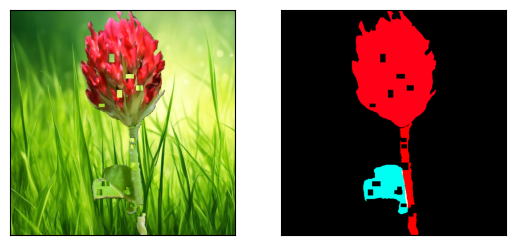

In [9]:
new_config = copy.deepcopy(default_config)
new_config['augmentations_config_path'] = './configs/augmentation_config_strong.py'

pipeline = Pipeline(
    project_config=new_config,
    feature_sampler_limitations=default_feature_sampler_limitations,
    verbose=0
)

pipeline.augmentor.augmentation_config['aug_list'] = [
    {
        'target': ['object_part'],
        'terminate': False,
        'apply_to_classes': 'all',
        'apply_to_object_types': 'all',
        'apply_to_tags': 'all',
        'exclude_classes': [],
        'exclude_object_types': [],
        'exclude_tags': [],
        'pipeline': A.Compose([
            A.CoarseDropout(always_apply=True, p=1, max_holes=8, max_height=30, max_width=30, min_holes=8, min_height=10, min_width=10, fill_value=50, mask_fill_value=0),
        ], p=1.0, is_check_shapes=True)
    }
]

pipeline.prepare()

generated_scene, mask_part_list = pipeline.run(num_objects=1)
save_results(generated_scene, mask_part_list)
reset_random()

Применение только к бутону

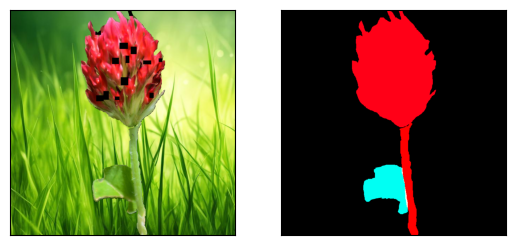

In [10]:
new_config = copy.deepcopy(default_config)
new_config['augmentations_config_path'] = './configs/augmentation_config_strong.py'

pipeline = Pipeline(
    project_config=new_config,
    feature_sampler_limitations=default_feature_sampler_limitations,
    verbose=0
)

pipeline.augmentor.augmentation_config['aug_list'] = [
    {
        'target': ['object_part'],
        'terminate': False,
        'apply_to_classes': 'all',
        'apply_to_object_types': [part_type2num['flower']],
        'apply_to_tags': 'all',
        'exclude_classes': [],
        'exclude_object_types': [],
        'exclude_tags': [],
        'pipeline': A.Compose([
            A.CoarseDropout(always_apply=True, p=1, max_holes=20, max_height=30, max_width=30, min_holes=8, min_height=10, min_width=10, fill_value=0, mask_fill_value=None),
        ], p=1.0, is_check_shapes=True)
    }
]

pipeline.prepare()

generated_scene, mask_part_list = pipeline.run(num_objects=1)
save_results(generated_scene, mask_part_list)
reset_random()

Применение только к фону

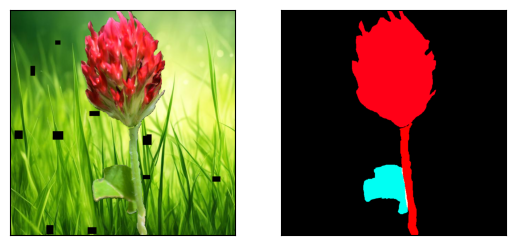

In [11]:
reset_random(6062)
new_config = copy.deepcopy(default_config)
new_config['augmentations_config_path'] = './configs/augmentation_config_strong.py'

pipeline = Pipeline(
    project_config=new_config,
    feature_sampler_limitations=default_feature_sampler_limitations,
    verbose=0
)

pipeline.augmentor.augmentation_config['aug_list'] = [
    {
        'target': ['background'],
        'terminate': False,
        'apply_to_classes': 'all',
        'apply_to_object_types': [part_type2num['flower']],
        'apply_to_tags': 'all',
        'exclude_classes': [],
        'exclude_object_types': [],
        'exclude_tags': [],
        'pipeline': A.Compose([
            A.CoarseDropout(always_apply=True, p=1, max_holes=20, max_height=30, max_width=30, min_holes=8, min_height=10, min_width=10, fill_value=0, mask_fill_value=None),
        ], p=1.0, is_check_shapes=True)
    }
]

pipeline.prepare()

generated_scene, mask_part_list = pipeline.run(num_objects=1)
save_results(generated_scene, mask_part_list)
reset_random()

# Изменение типов аугментации

Blur – размытие изображения с ядром случайного заданного размера

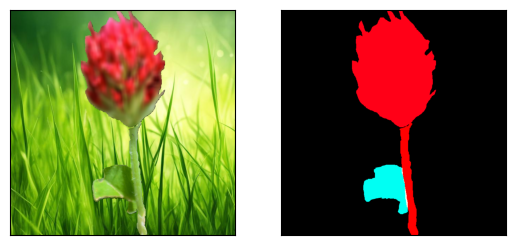

In [12]:
new_config = copy.deepcopy(default_config)
new_config['augmentations_config_path'] = './configs/augmentation_config_strong.py'

pipeline = Pipeline(
    project_config=new_config,
    feature_sampler_limitations=default_feature_sampler_limitations,
    verbose=0
)

pipeline.augmentor.augmentation_config['aug_list'] = [
    {
        'target': ['object_part'],
        'terminate': False,
        'apply_to_classes': 'all',
        'apply_to_object_types': [part_type2num['flower']],
        'apply_to_tags': 'all',
        'exclude_classes': [],
        'exclude_object_types': [],
        'exclude_tags': [],
        'pipeline': A.Compose([
            A.Blur(always_apply=False, p=1, blur_limit=(17, 17)),
        ], p=1.0, is_check_shapes=True)
    }
]

pipeline.prepare()

generated_scene, mask_part_list = pipeline.run(num_objects=1)
save_results(generated_scene, mask_part_list)
reset_random()

CLAHE – эквализация гистограммы изображения

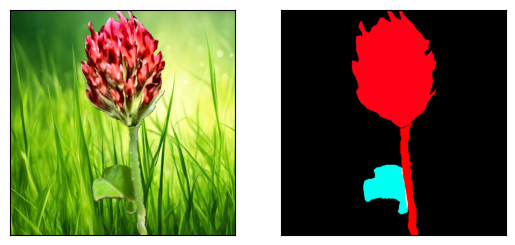

In [13]:
new_config = copy.deepcopy(default_config)
new_config['augmentations_config_path'] = './configs/augmentation_config_strong.py'

pipeline = Pipeline(
    project_config=new_config,
    feature_sampler_limitations=default_feature_sampler_limitations,
    verbose=0
)

pipeline.augmentor.augmentation_config['aug_list'] = [
    {
        'target': ['object_part'],
        'terminate': False,
        'apply_to_classes': 'all',
        'apply_to_object_types': [part_type2num['flower']],
        'apply_to_tags': 'all',
        'exclude_classes': [],
        'exclude_object_types': [],
        'exclude_tags': [],
        'pipeline': A.Compose([
            A.CLAHE(always_apply=True, p=1, clip_limit=(1, 4.0), tile_grid_size=(8, 8)),
        ], p=1.0, is_check_shapes=True)
    }
]

pipeline.prepare()

generated_scene, mask_part_list = pipeline.run(num_objects=1)
save_results(generated_scene, mask_part_list)
reset_random()

Posterize – уменьшение точности хранения цветов изображения

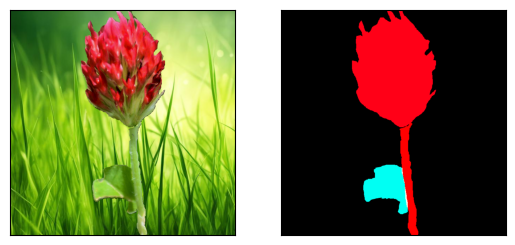

In [14]:
new_config = copy.deepcopy(default_config)
new_config['augmentations_config_path'] = './configs/augmentation_config_strong.py'

pipeline = Pipeline(
    project_config=new_config,
    feature_sampler_limitations=default_feature_sampler_limitations,
    verbose=0
)

pipeline.augmentor.augmentation_config['aug_list'] = [
    {
        'target': ['object_part'],
        'terminate': False,
        'apply_to_classes': 'all',
        'apply_to_object_types': [part_type2num['flower']],
        'apply_to_tags': 'all',
        'exclude_classes': [],
        'exclude_object_types': [],
        'exclude_tags': [],
        'pipeline': A.Compose([
            A.Posterize(always_apply=True),
        ], p=1.0, is_check_shapes=True)
    }
]

pipeline.prepare()

generated_scene, mask_part_list = pipeline.run(num_objects=1)
save_results(generated_scene, mask_part_list)
reset_random()

PixelDropout – исключение случайных пикселей из изображения

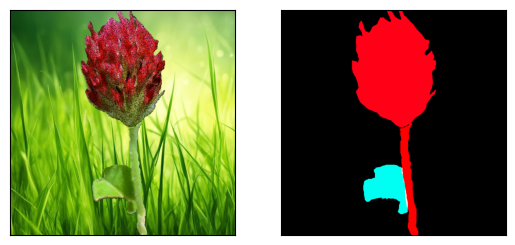

In [15]:
new_config = copy.deepcopy(default_config)
new_config['augmentations_config_path'] = './configs/augmentation_config_strong.py'

pipeline = Pipeline(
    project_config=new_config,
    feature_sampler_limitations=default_feature_sampler_limitations,
    verbose=0
)

pipeline.augmentor.augmentation_config['aug_list'] = [
    {
        'target': ['object_part'],
        'terminate': False,
        'apply_to_classes': 'all',
        'apply_to_object_types': [part_type2num['flower']],
        'apply_to_tags': 'all',
        'exclude_classes': [],
        'exclude_object_types': [],
        'exclude_tags': [],
        'pipeline': A.Compose([
            A.PixelDropout(dropout_prob=0.25, per_channel=False, drop_value=0, mask_drop_value=None, always_apply=True, p=1),
        ], p=1.0, is_check_shapes=True)
    }
]

pipeline.prepare()

generated_scene, mask_part_list = pipeline.run(num_objects=1)
save_results(generated_scene, mask_part_list)
reset_random()

ChannelDropout – исключение случайного канала из изображения

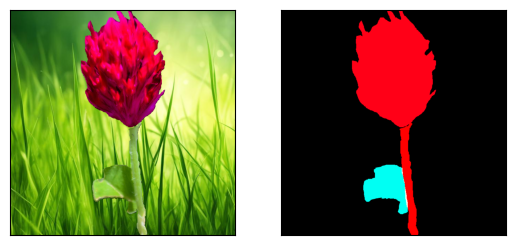

In [16]:
new_config = copy.deepcopy(default_config)
new_config['augmentations_config_path'] = './configs/augmentation_config_strong.py'

pipeline = Pipeline(
    project_config=new_config,
    feature_sampler_limitations=default_feature_sampler_limitations,
    verbose=0
)

pipeline.augmentor.augmentation_config['aug_list'] = [
    {
        'target': ['object_part'],
        'terminate': False,
        'apply_to_classes': 'all',
        'apply_to_object_types': [part_type2num['flower']],
        'apply_to_tags': 'all',
        'exclude_classes': [],
        'exclude_object_types': [],
        'exclude_tags': [],
        'pipeline': A.Compose([
            A.ChannelDropout(always_apply=True, p=1),
        ], p=1.0, is_check_shapes=True)
    }
]

pipeline.prepare()

generated_scene, mask_part_list = pipeline.run(num_objects=1)
save_results(generated_scene, mask_part_list)
reset_random()

ChannelShuffle – перестановка каналов изображения случайным образом

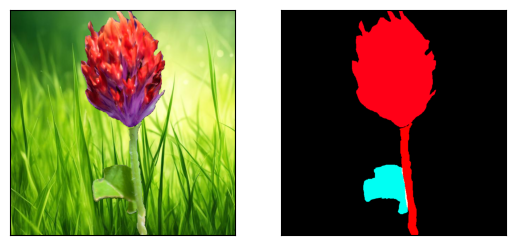

In [17]:
new_config = copy.deepcopy(default_config)
new_config['augmentations_config_path'] = './configs/augmentation_config_strong.py'

pipeline = Pipeline(
    project_config=new_config,
    feature_sampler_limitations=default_feature_sampler_limitations,
    verbose=0
)

pipeline.augmentor.augmentation_config['aug_list'] = [
    {
        'target': ['object_part'],
        'terminate': False,
        'apply_to_classes': 'all',
        'apply_to_object_types': [part_type2num['flower']],
        'apply_to_tags': 'all',
        'exclude_classes': [],
        'exclude_object_types': [],
        'exclude_tags': [],
        'pipeline': A.Compose([
            A.ChannelShuffle(always_apply=True, p=1),
        ], p=1.0, is_check_shapes=True)
    }
]

pipeline.prepare()

generated_scene, mask_part_list = pipeline.run(num_objects=1)
save_results(generated_scene, mask_part_list)
reset_random()

Downscale – снижение качества изображения за счет загрубления изображения и повышения разрешения до исходного размера

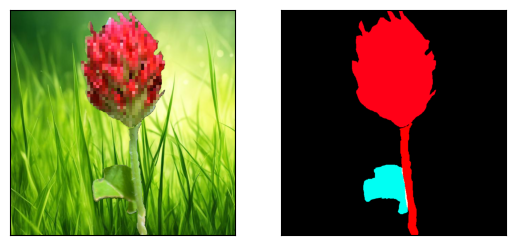

In [18]:
new_config = copy.deepcopy(default_config)
new_config['augmentations_config_path'] = './configs/augmentation_config_strong.py'

pipeline = Pipeline(
    project_config=new_config,
    feature_sampler_limitations=default_feature_sampler_limitations,
    verbose=0
)

pipeline.augmentor.augmentation_config['aug_list'] = [
    {
        'target': ['object_part'],
        'terminate': False,
        'apply_to_classes': 'all',
        'apply_to_object_types': [part_type2num['flower']],
        'apply_to_tags': 'all',
        'exclude_classes': [],
        'exclude_object_types': [],
        'exclude_tags': [],
        'pipeline': A.Compose([
            A.Downscale(always_apply=True, p=1, scale_min=0.1, scale_max=0.1),
        ], p=1.0, is_check_shapes=True)
    }
]

pipeline.prepare()

generated_scene, mask_part_list = pipeline.run(num_objects=1)
save_results(generated_scene, mask_part_list)
reset_random()

JpegCompression – снижение качества изображения за счет сжатия с потерями

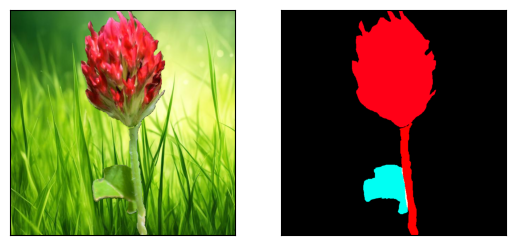

In [19]:
new_config = copy.deepcopy(default_config)
new_config['augmentations_config_path'] = './configs/augmentation_config_strong.py'

pipeline = Pipeline(
    project_config=new_config,
    feature_sampler_limitations=default_feature_sampler_limitations,
    verbose=0
)

pipeline.augmentor.augmentation_config['aug_list'] = [
    {
        'target': ['object_part'],
        'terminate': False,
        'apply_to_classes': 'all',
        'apply_to_object_types': [part_type2num['flower']],
        'apply_to_tags': 'all',
        'exclude_classes': [],
        'exclude_object_types': [],
        'exclude_tags': [],
        'pipeline': A.Compose([
            A.JpegCompression(always_apply=True, p=1, quality_lower=50, quality_upper=50),
        ], p=1.0, is_check_shapes=True)
    }
]

pipeline.prepare()

generated_scene, mask_part_list = pipeline.run(num_objects=1)
save_results(generated_scene, mask_part_list)
reset_random()

GaussNoise – добавление гауссовского шума в изображение

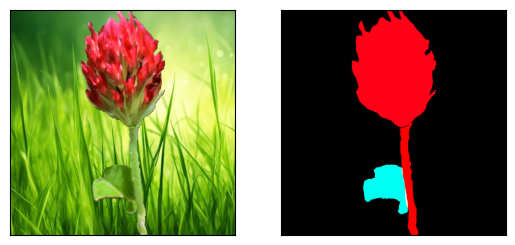

In [20]:
new_config = copy.deepcopy(default_config)
new_config['augmentations_config_path'] = './configs/augmentation_config_strong.py'

pipeline = Pipeline(
    project_config=new_config,
    feature_sampler_limitations=default_feature_sampler_limitations,
    verbose=0
)

pipeline.augmentor.augmentation_config['aug_list'] = [
    {
        'target': ['object_part'],
        'terminate': False,
        'apply_to_classes': 'all',
        'apply_to_object_types': [part_type2num['flower']],
        'apply_to_tags': 'all',
        'exclude_classes': [],
        'exclude_object_types': [],
        'exclude_tags': [],
        'pipeline': A.Compose([
            A.GaussNoise(always_apply=True, p=1),
        ], p=1.0, is_check_shapes=True)
    }
]

pipeline.prepare()

generated_scene, mask_part_list = pipeline.run(num_objects=1)
save_results(generated_scene, mask_part_list)
reset_random()

ISONoise – добавление шума, моделирующего шут матрицы камеры

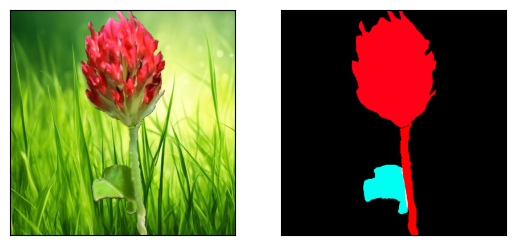

In [21]:
new_config = copy.deepcopy(default_config)
new_config['augmentations_config_path'] = './configs/augmentation_config_strong.py'

pipeline = Pipeline(
    project_config=new_config,
    feature_sampler_limitations=default_feature_sampler_limitations,
    verbose=0
)

pipeline.augmentor.augmentation_config['aug_list'] = [
    {
        'target': ['object_part'],
        'terminate': False,
        'apply_to_classes': 'all',
        'apply_to_object_types': [part_type2num['flower']],
        'apply_to_tags': 'all',
        'exclude_classes': [],
        'exclude_object_types': [],
        'exclude_tags': [],
        'pipeline': A.Compose([
            A.ISONoise(always_apply=True, p=1),
        ], p=1.0, is_check_shapes=True)
    }
]

pipeline.prepare()

generated_scene, mask_part_list = pipeline.run(num_objects=1)
save_results(generated_scene, mask_part_list)
reset_random()

Normalize – нормализация изображения с использованием среднего значения и стандартного отклонения

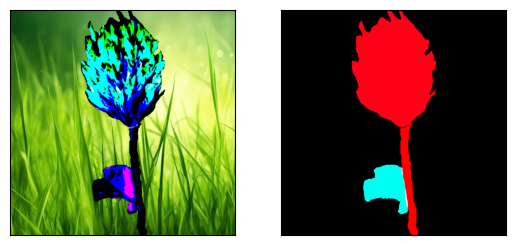

In [22]:
new_config = copy.deepcopy(default_config)
new_config['augmentations_config_path'] = './configs/augmentation_config_strong.py'

pipeline = Pipeline(
    project_config=new_config,
    feature_sampler_limitations=default_feature_sampler_limitations,
    verbose=0
)

pipeline.augmentor.augmentation_config['aug_list'] = [
    {
        'target': ['object_part'],
        'terminate': False,
        'apply_to_classes': 'all',
        'apply_to_object_types': 'all',
        'apply_to_tags': 'all',
        'exclude_classes': [],
        'exclude_object_types': [],
        'exclude_tags': [],
        'pipeline': A.Compose([
            A.Normalize(always_apply=True, p=1),
        ], p=1.0, is_check_shapes=True)
    }
]

pipeline.prepare()

generated_scene, mask_part_list = pipeline.run(num_objects=1)
save_results(generated_scene, mask_part_list)
reset_random()

RGBShift – случайный сдвиг значений в каналах изображения

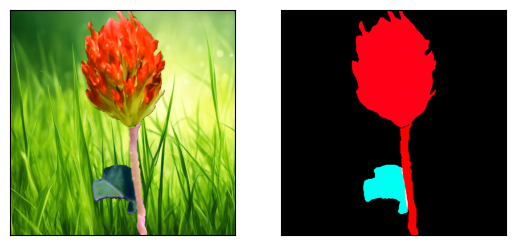

In [23]:
new_config = copy.deepcopy(default_config)
new_config['augmentations_config_path'] = './configs/augmentation_config_strong.py'

pipeline = Pipeline(
    project_config=new_config,
    feature_sampler_limitations=default_feature_sampler_limitations,
    verbose=0
)

pipeline.augmentor.augmentation_config['aug_list'] = [
    {
        'target': ['object_part'],
        'terminate': False,
        'apply_to_classes': 'all',
        'apply_to_object_types': 'all',
        'apply_to_tags': 'all',
        'exclude_classes': [],
        'exclude_object_types': [],
        'exclude_tags': [],
        'pipeline': A.Compose([
            A.RGBShift(always_apply=True, p=1, r_shift_limit=80, g_shift_limit=80, b_shift_limit=80),
        ], p=1.0, is_check_shapes=True)
    }
]

pipeline.prepare()

generated_scene, mask_part_list = pipeline.run(num_objects=1)
save_results(generated_scene, mask_part_list)
reset_random()

HueSaturationValue – случайный сдвиг значений в цветовом пространстве HSV вместо исходных каналов изображения

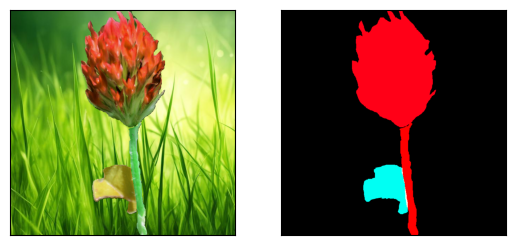

In [24]:
new_config = copy.deepcopy(default_config)
new_config['augmentations_config_path'] = './configs/augmentation_config_strong.py'

pipeline = Pipeline(
    project_config=new_config,
    feature_sampler_limitations=default_feature_sampler_limitations,
    verbose=0
)

pipeline.augmentor.augmentation_config['aug_list'] = [
    {
        'target': ['object_part'],
        'terminate': False,
        'apply_to_classes': 'all',
        'apply_to_object_types': 'all',
        'apply_to_tags': 'all',
        'exclude_classes': [],
        'exclude_object_types': [],
        'exclude_tags': [],
        'pipeline': A.Compose([
            A.HueSaturationValue(always_apply=True, p=1),
        ], p=1.0, is_check_shapes=True)
    }
]

pipeline.prepare()

generated_scene, mask_part_list = pipeline.run(num_objects=1)
save_results(generated_scene, mask_part_list)
reset_random()

RandomBrightnessContrast – изменение яркости и контрастности изображения на случайную величину

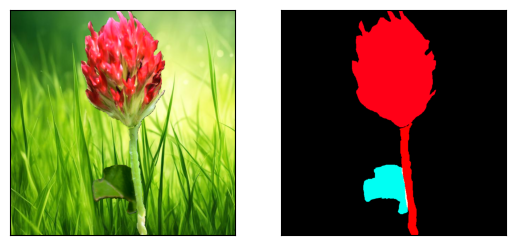

In [25]:
new_config = copy.deepcopy(default_config)
new_config['augmentations_config_path'] = './configs/augmentation_config_strong.py'

pipeline = Pipeline(
    project_config=new_config,
    feature_sampler_limitations=default_feature_sampler_limitations,
    verbose=0
)

pipeline.augmentor.augmentation_config['aug_list'] = [
    {
        'target': ['object_part'],
        'terminate': False,
        'apply_to_classes': 'all',
        'apply_to_object_types': 'all',
        'apply_to_tags': 'all',
        'exclude_classes': [],
        'exclude_object_types': [],
        'exclude_tags': [],
        'pipeline': A.Compose([
            A.RandomBrightnessContrast(always_apply=True, p=1),
        ], p=1.0, is_check_shapes=True)
    }
]

pipeline.prepare()

generated_scene, mask_part_list = pipeline.run(num_objects=1)
save_results(generated_scene, mask_part_list)
reset_random()

RandomContrast – изменение контрастности изображения на случайную величину

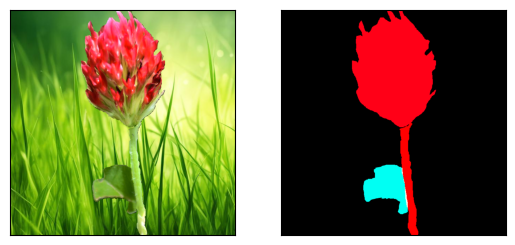

In [26]:
new_config = copy.deepcopy(default_config)
new_config['augmentations_config_path'] = './configs/augmentation_config_strong.py'

pipeline = Pipeline(
    project_config=new_config,
    feature_sampler_limitations=default_feature_sampler_limitations,
    verbose=0
)

pipeline.augmentor.augmentation_config['aug_list'] = [
    {
        'target': ['object_part'],
        'terminate': False,
        'apply_to_classes': 'all',
        'apply_to_object_types': 'all',
        'apply_to_tags': 'all',
        'exclude_classes': [],
        'exclude_object_types': [],
        'exclude_tags': [],
        'pipeline': A.Compose([
            A.RandomContrast(always_apply=True, p=1),
        ], p=1.0, is_check_shapes=True)
    }
]

pipeline.prepare()

generated_scene, mask_part_list = pipeline.run(num_objects=1)
save_results(generated_scene, mask_part_list)
reset_random()

RandomFog – симуляция добавления тумана на изображение

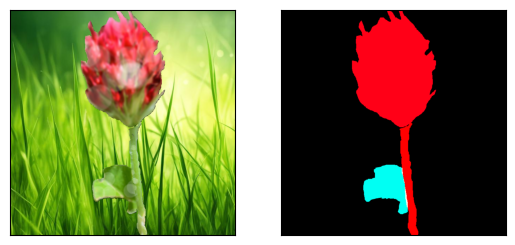

In [27]:
new_config = copy.deepcopy(default_config)
new_config['augmentations_config_path'] = './configs/augmentation_config_strong.py'

pipeline = Pipeline(
    project_config=new_config,
    feature_sampler_limitations=default_feature_sampler_limitations,
    verbose=0
)

pipeline.augmentor.augmentation_config['aug_list'] = [
    {
        'target': ['object_part'],
        'terminate': False,
        'apply_to_classes': 'all',
        'apply_to_object_types': 'all',
        'apply_to_tags': 'all',
        'exclude_classes': [],
        'exclude_object_types': [],
        'exclude_tags': [],
        'pipeline': A.Compose([
            A.RandomFog(always_apply=True, p=1, fog_coef_lower=0.9, fog_coef_upper=1, alpha_coef=0.2),
        ], p=1.0, is_check_shapes=True)
    }
]

pipeline.prepare()

generated_scene, mask_part_list = pipeline.run(num_objects=1)
save_results(generated_scene, mask_part_list)
reset_random()

RandomShadow – симуляция добавления тени на изображение

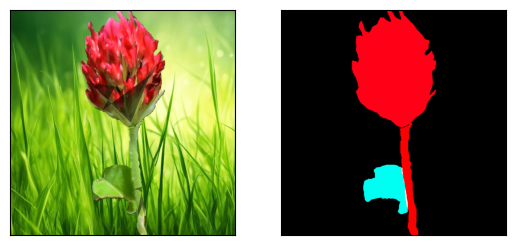

In [28]:
new_config = copy.deepcopy(default_config)
new_config['augmentations_config_path'] = './configs/augmentation_config_strong.py'

pipeline = Pipeline(
    project_config=new_config,
    feature_sampler_limitations=default_feature_sampler_limitations,
    verbose=0
)

pipeline.augmentor.augmentation_config['aug_list'] = [
    {
        'target': ['object_part'],
        'terminate': False,
        'apply_to_classes': 'all',
        'apply_to_object_types': 'all',
        'apply_to_tags': 'all',
        'exclude_classes': [],
        'exclude_object_types': [],
        'exclude_tags': [],
        'pipeline': A.Compose([
            A.RandomShadow(always_apply=True, p=1),
        ], p=1.0, is_check_shapes=True)
    }
]

pipeline.prepare()

generated_scene, mask_part_list = pipeline.run(num_objects=1)
save_results(generated_scene, mask_part_list)
reset_random()

RandomSnow – симуляция добавления снега на изображение

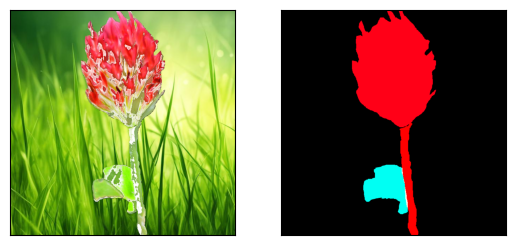

In [29]:
new_config = copy.deepcopy(default_config)
new_config['augmentations_config_path'] = './configs/augmentation_config_strong.py'

pipeline = Pipeline(
    project_config=new_config,
    feature_sampler_limitations=default_feature_sampler_limitations,
    verbose=0
)

pipeline.augmentor.augmentation_config['aug_list'] = [
    {
        'target': ['object_part'],
        'terminate': False,
        'apply_to_classes': 'all',
        'apply_to_object_types': 'all',
        'apply_to_tags': 'all',
        'exclude_classes': [],
        'exclude_object_types': [],
        'exclude_tags': [],
        'pipeline': A.Compose([
            A.RandomSnow(always_apply=True, p=1),
        ], p=1.0, is_check_shapes=True)
    }
]

pipeline.prepare()

generated_scene, mask_part_list = pipeline.run(num_objects=1)
save_results(generated_scene, mask_part_list)
reset_random()

RandomSunFlare – симуляция добавления бликов на изображение

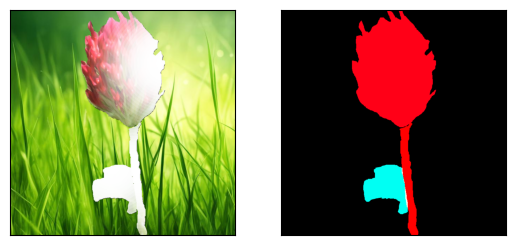

In [30]:
new_config = copy.deepcopy(default_config)
new_config['augmentations_config_path'] = './configs/augmentation_config_strong.py'

pipeline = Pipeline(
    project_config=new_config,
    feature_sampler_limitations=default_feature_sampler_limitations,
    verbose=0
)

pipeline.augmentor.augmentation_config['aug_list'] = [
    {
        'target': ['object_part'],
        'terminate': False,
        'apply_to_classes': 'all',
        'apply_to_object_types': 'all',
        'apply_to_tags': 'all',
        'exclude_classes': [],
        'exclude_object_types': [],
        'exclude_tags': [],
        'pipeline': A.Compose([
            A.RandomSunFlare(always_apply=True, p=1),
        ], p=1.0, is_check_shapes=True)
    }
]

pipeline.prepare()

generated_scene, mask_part_list = pipeline.run(num_objects=1)
save_results(generated_scene, mask_part_list)
reset_random()

RandomGravel – симуляция добавления гравия на изображение

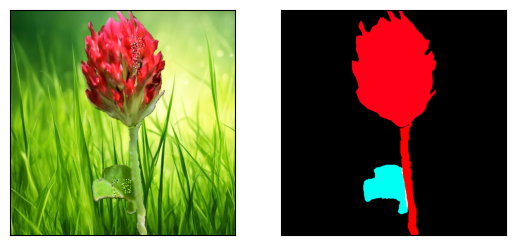

In [31]:
new_config = copy.deepcopy(default_config)
new_config['augmentations_config_path'] = './configs/augmentation_config_strong.py'

pipeline = Pipeline(
    project_config=new_config,
    feature_sampler_limitations=default_feature_sampler_limitations,
    verbose=0
)

pipeline.augmentor.augmentation_config['aug_list'] = [
    {
        'target': ['object_part'],
        'terminate': False,
        'apply_to_classes': 'all',
        'apply_to_object_types': 'all',
        'apply_to_tags': 'all',
        'exclude_classes': [],
        'exclude_object_types': [],
        'exclude_tags': [],
        'pipeline': A.Compose([
            A.RandomGravel(always_apply=True, p=1, gravel_roi=(0.3, 0.4, 0.9, 0.9), number_of_patches=8),
        ], p=1.0, is_check_shapes=True)
    }
]

pipeline.prepare()

generated_scene, mask_part_list = pipeline.run(num_objects=1)
save_results(generated_scene, mask_part_list)
reset_random()

RandomRain – симуляция добавления дождя на изображение

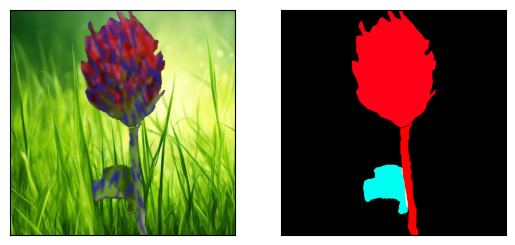

In [32]:
new_config = copy.deepcopy(default_config)
new_config['augmentations_config_path'] = './configs/augmentation_config_strong.py'

pipeline = Pipeline(
    project_config=new_config,
    feature_sampler_limitations=default_feature_sampler_limitations,
    verbose=0
)

pipeline.augmentor.augmentation_config['aug_list'] = [
    {
        'target': ['object_part'],
        'terminate': False,
        'apply_to_classes': 'all',
        'apply_to_object_types': 'all',
        'apply_to_tags': 'all',
        'exclude_classes': [],
        'exclude_object_types': [],
        'exclude_tags': [],
        'pipeline': A.Compose([
            A.RandomRain(always_apply=True, p=1, slant_lower=-10, slant_upper=10, drop_length=30, drop_width=3, drop_color=(50, 50, 200), blur_value=11, brightness_coefficient=0.7),
        ], p=1.0, is_check_shapes=True)
    }
]

pipeline.prepare()

generated_scene, mask_part_list = pipeline.run(num_objects=1)
save_results(generated_scene, mask_part_list)
reset_random()

ColorJitter – случайное изменение яркости, контрастности и насыщенности изображения

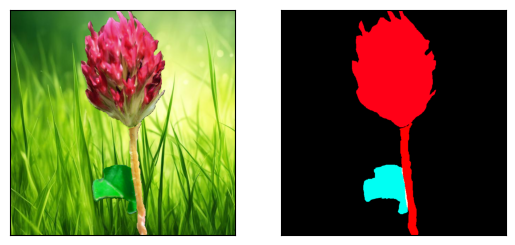

In [33]:
new_config = copy.deepcopy(default_config)
new_config['augmentations_config_path'] = './configs/augmentation_config_strong.py'

pipeline = Pipeline(
    project_config=new_config,
    feature_sampler_limitations=default_feature_sampler_limitations,
    verbose=0
)

pipeline.augmentor.augmentation_config['aug_list'] = [
    {
        'target': ['object_part'],
        'terminate': False,
        'apply_to_classes': 'all',
        'apply_to_object_types': 'all',
        'apply_to_tags': 'all',
        'exclude_classes': [],
        'exclude_object_types': [],
        'exclude_tags': [],
        'pipeline': A.Compose([
            A.ColorJitter(always_apply=True, p=1),
        ], p=1.0, is_check_shapes=True)
    }
]

pipeline.prepare()

generated_scene, mask_part_list = pipeline.run(num_objects=1)
save_results(generated_scene, mask_part_list)
reset_random()

Equalize – цветокоррекция путел эквализации гистограммы изображения

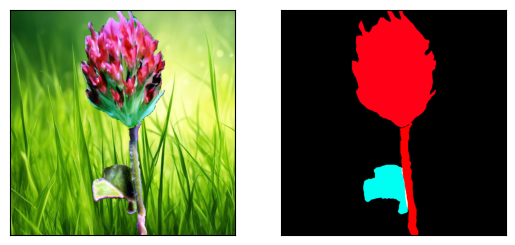

In [34]:
new_config = copy.deepcopy(default_config)
new_config['augmentations_config_path'] = './configs/augmentation_config_strong.py'

pipeline = Pipeline(
    project_config=new_config,
    feature_sampler_limitations=default_feature_sampler_limitations,
    verbose=0
)

pipeline.augmentor.augmentation_config['aug_list'] = [
    {
        'target': ['object_part'],
        'terminate': False,
        'apply_to_classes': 'all',
        'apply_to_object_types': 'all',
        'apply_to_tags': 'all',
        'exclude_classes': [],
        'exclude_object_types': [],
        'exclude_tags': [],
        'pipeline': A.Compose([
            A.Equalize(always_apply=True, p=1),
        ], p=1.0, is_check_shapes=True)
    }
]

pipeline.prepare()

generated_scene, mask_part_list = pipeline.run(num_objects=1)
save_results(generated_scene, mask_part_list)
reset_random()

FancyPCA – изменение интенсивности цветовых каналов изображений в соответствии с естественными вариациями, выраженными главными компонентами цветов пикселей

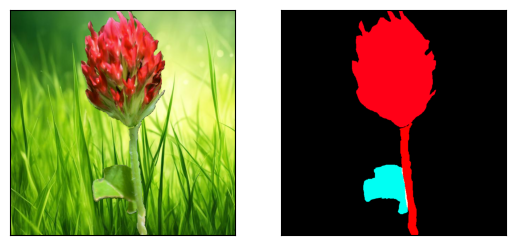

In [35]:
new_config = copy.deepcopy(default_config)
new_config['augmentations_config_path'] = './configs/augmentation_config_strong.py'

pipeline = Pipeline(
    project_config=new_config,
    feature_sampler_limitations=default_feature_sampler_limitations,
    verbose=0
)

pipeline.augmentor.augmentation_config['aug_list'] = [
    {
        'target': ['object_part'],
        'terminate': False,
        'apply_to_classes': 'all',
        'apply_to_object_types': 'all',
        'apply_to_tags': 'all',
        'exclude_classes': [],
        'exclude_object_types': [],
        'exclude_tags': [],
        'pipeline': A.Compose([
            A.FancyPCA(always_apply=True, p=1, alpha=0.4),
        ], p=1.0, is_check_shapes=True)
    }
]

pipeline.prepare()

generated_scene, mask_part_list = pipeline.run(num_objects=1)
save_results(generated_scene, mask_part_list)
reset_random()

ToGray – перевод изображения из красного, зеленого, синего в оттенки серого

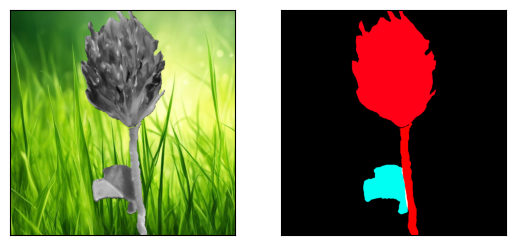

In [36]:
new_config = copy.deepcopy(default_config)
new_config['augmentations_config_path'] = './configs/augmentation_config_strong.py'

pipeline = Pipeline(
    project_config=new_config,
    feature_sampler_limitations=default_feature_sampler_limitations,
    verbose=0
)

pipeline.augmentor.augmentation_config['aug_list'] = [
    {
        'target': ['object_part'],
        'terminate': False,
        'apply_to_classes': 'all',
        'apply_to_object_types': 'all',
        'apply_to_tags': 'all',
        'exclude_classes': [],
        'exclude_object_types': [],
        'exclude_tags': [],
        'pipeline': A.Compose([
            A.ToGray(always_apply=True, p=1),
        ], p=1.0, is_check_shapes=True)
    }
]

pipeline.prepare()

generated_scene, mask_part_list = pipeline.run(num_objects=1)
save_results(generated_scene, mask_part_list)
reset_random()

### Геометрические аугментации

Affine – аффинное преобразование изображения

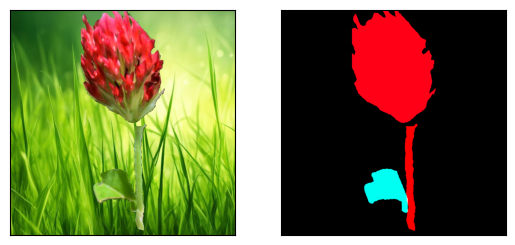

In [38]:
new_config = copy.deepcopy(default_config)
new_config['augmentations_config_path'] = './configs/augmentation_config_strong.py'

pipeline = Pipeline(
    project_config=new_config,
    feature_sampler_limitations=default_feature_sampler_limitations,
    verbose=0
)

pipeline.augmentor.augmentation_config['aug_list'] = [
    {
        'target': ['object_part'],
        'terminate': False,
        'apply_to_classes': 'all',
        'apply_to_object_types': 'all',
        'apply_to_tags': 'all',
        'exclude_classes': [],
        'exclude_object_types': [],
        'exclude_tags': [],
        'pipeline': A.Compose([
            A.Affine(always_apply=True, p=1),
        ], p=1.0, is_check_shapes=True)
    }
]

pipeline.prepare()

generated_scene, mask_part_list = pipeline.run(num_objects=1)
save_results(generated_scene, mask_part_list)
reset_random()

Flip – поворот изображения горизонтально, вертикально или одновременно горизонтально и вертикально;

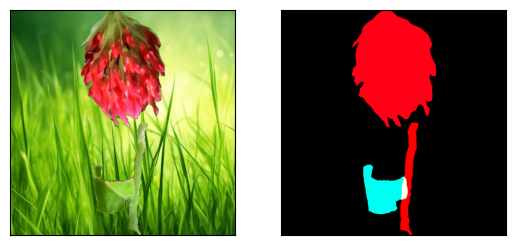

In [39]:
new_config = copy.deepcopy(default_config)
new_config['augmentations_config_path'] = './configs/augmentation_config_strong.py'

pipeline = Pipeline(
    project_config=new_config,
    feature_sampler_limitations=default_feature_sampler_limitations,
    verbose=0
)

pipeline.augmentor.augmentation_config['aug_list'] = [
    {
        'target': ['object_part'],
        'terminate': False,
        'apply_to_classes': 'all',
        'apply_to_object_types': 'all',
        'apply_to_tags': 'all',
        'exclude_classes': [],
        'exclude_object_types': [],
        'exclude_tags': [],
        'pipeline': A.Compose([
            A.Flip(always_apply=True, p=1),
        ], p=1.0, is_check_shapes=True)
    }
]

pipeline.prepare()

generated_scene, mask_part_list = pipeline.run(num_objects=1)
save_results(generated_scene, mask_part_list)
reset_random()

GridDistortion – трансформация изображения по сетке

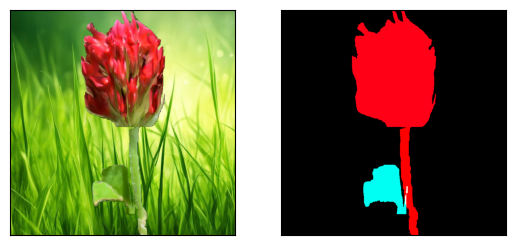

In [40]:
new_config = copy.deepcopy(default_config)
new_config['augmentations_config_path'] = './configs/augmentation_config_strong.py'

pipeline = Pipeline(
    project_config=new_config,
    feature_sampler_limitations=default_feature_sampler_limitations,
    verbose=0
)

pipeline.augmentor.augmentation_config['aug_list'] = [
    {
        'target': ['object_part'],
        'terminate': False,
        'apply_to_classes': 'all',
        'apply_to_object_types': 'all',
        'apply_to_tags': 'all',
        'exclude_classes': [],
        'exclude_object_types': [],
        'exclude_tags': [],
        'pipeline': A.Compose([
            A.GridDistortion(always_apply=True, p=1, num_steps=15, distort_limit=0.6),
        ], p=1.0, is_check_shapes=True)
    }
]

pipeline.prepare()

generated_scene, mask_part_list = pipeline.run(num_objects=1)
save_results(generated_scene, mask_part_list)
reset_random()

GridDropout – исключение случайных квадратных участков из изображения и маски с аннотацией изображения

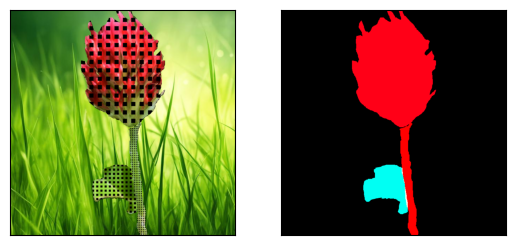

In [41]:
new_config = copy.deepcopy(default_config)
new_config['augmentations_config_path'] = './configs/augmentation_config_strong.py'

pipeline = Pipeline(
    project_config=new_config,
    feature_sampler_limitations=default_feature_sampler_limitations,
    verbose=0
)

pipeline.augmentor.augmentation_config['aug_list'] = [
    {
        'target': ['object_part'],
        'terminate': False,
        'apply_to_classes': 'all',
        'apply_to_object_types': 'all',
        'apply_to_tags': 'all',
        'exclude_classes': [],
        'exclude_object_types': [],
        'exclude_tags': [],
        'pipeline': A.Compose([
            A.GridDropout(always_apply=True, p=1),
        ], p=1.0, is_check_shapes=True)
    }
]

pipeline.prepare()

generated_scene, mask_part_list = pipeline.run(num_objects=1)
save_results(generated_scene, mask_part_list)
reset_random()

HorizontalFlip – горизонтальное отображение

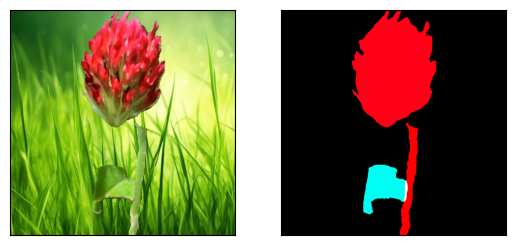

In [42]:
new_config = copy.deepcopy(default_config)
new_config['augmentations_config_path'] = './configs/augmentation_config_strong.py'

pipeline = Pipeline(
    project_config=new_config,
    feature_sampler_limitations=default_feature_sampler_limitations,
    verbose=0
)

pipeline.augmentor.augmentation_config['aug_list'] = [
    {
        'target': ['object_part'],
        'terminate': False,
        'apply_to_classes': 'all',
        'apply_to_object_types': 'all',
        'apply_to_tags': 'all',
        'exclude_classes': [],
        'exclude_object_types': [],
        'exclude_tags': [],
        'pipeline': A.Compose([
            A.HorizontalFlip(always_apply=True, p=1),
        ], p=1.0, is_check_shapes=True)
    }
]

pipeline.prepare()

generated_scene, mask_part_list = pipeline.run(num_objects=1)
save_results(generated_scene, mask_part_list)
reset_random()

Rotate – поворот изображения на произвольный угол

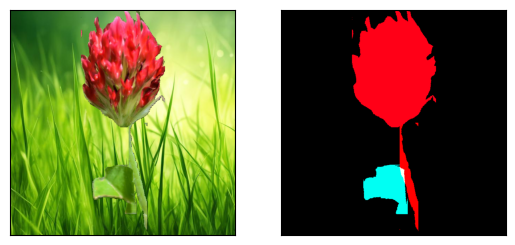

In [43]:
new_config = copy.deepcopy(default_config)
new_config['augmentations_config_path'] = './configs/augmentation_config_strong.py'

pipeline = Pipeline(
    project_config=new_config,
    feature_sampler_limitations=default_feature_sampler_limitations,
    verbose=0
)

pipeline.augmentor.augmentation_config['aug_list'] = [
    {
        'target': ['object_part'],
        'terminate': False,
        'apply_to_classes': 'all',
        'apply_to_object_types': 'all',
        'apply_to_tags': 'all',
        'exclude_classes': [],
        'exclude_object_types': [],
        'exclude_tags': [],
        'pipeline': A.Compose([
            A.Rotate(always_apply=True, p=1, limit=10),
        ], p=1.0, is_check_shapes=True)
    }
]

pipeline.prepare()

generated_scene, mask_part_list = pipeline.run(num_objects=1)
save_results(generated_scene, mask_part_list)
reset_random()

Perspective – трансформация изменения перспективы

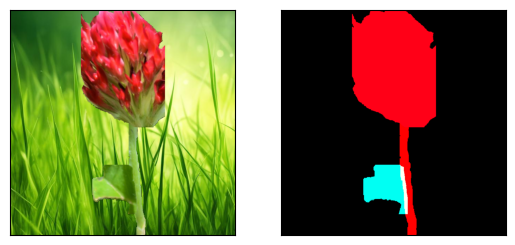

In [44]:
new_config = copy.deepcopy(default_config)
new_config['augmentations_config_path'] = './configs/augmentation_config_strong.py'

pipeline = Pipeline(
    project_config=new_config,
    feature_sampler_limitations=default_feature_sampler_limitations,
    verbose=0
)

pipeline.augmentor.augmentation_config['aug_list'] = [
    {
        'target': ['object_part'],
        'terminate': False,
        'apply_to_classes': 'all',
        'apply_to_object_types': 'all',
        'apply_to_tags': 'all',
        'exclude_classes': [],
        'exclude_object_types': [],
        'exclude_tags': [],
        'pipeline': A.Compose([
            A.Perspective(always_apply=True, p=1),
        ], p=1.0, is_check_shapes=True)
    }
]

pipeline.prepare()

generated_scene, mask_part_list = pipeline.run(num_objects=1)
save_results(generated_scene, mask_part_list)
reset_random()

## Объединение аугментаций

Несколько одинаковых трансформаций для каждого подобъекта

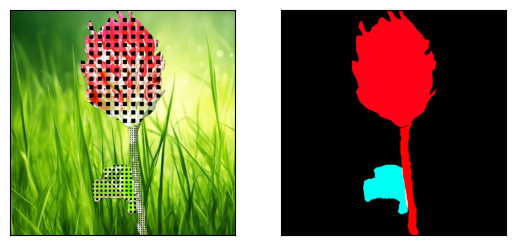

In [45]:
new_config = copy.deepcopy(default_config)
new_config['augmentations_config_path'] = './configs/augmentation_config_strong.py'

pipeline = Pipeline(
    project_config=new_config,
    feature_sampler_limitations=default_feature_sampler_limitations,
    verbose=0
)

pipeline.augmentor.augmentation_config['aug_list'] = [
    {
        'target': ['object_part'],
        'terminate': False,
        'apply_to_classes': 'all',
        'apply_to_object_types': 'all',
        'apply_to_tags': 'all',
        'exclude_classes': [],
        'exclude_object_types': [],
        'exclude_tags': [],
        'pipeline': A.Compose([
            A.RandomSnow(always_apply=True, p=1),
            A.GridDropout(always_apply=True, p=1),
        ], p=1.0, is_check_shapes=True)
    }
]

pipeline.prepare()

generated_scene, mask_part_list = pipeline.run(num_objects=1)
save_results(generated_scene, mask_part_list)
reset_random()

Разные трансформации для разных подобъектов

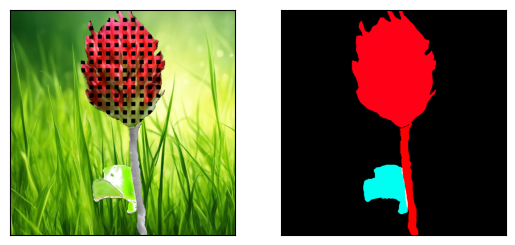

In [46]:
new_config = copy.deepcopy(default_config)
new_config['augmentations_config_path'] = './configs/augmentation_config_strong.py'

pipeline = Pipeline(
    project_config=new_config,
    feature_sampler_limitations=default_feature_sampler_limitations,
    verbose=0
)

pipeline.augmentor.augmentation_config['aug_list'] = [
    {
        'target': ['object_part'],
        'terminate': False,
        'apply_to_classes': 'all',
        'apply_to_object_types': [part_type2num['flower']],
        'apply_to_tags': 'all',
        'exclude_classes': [],
        'exclude_object_types': [],
        'exclude_tags': [],
        'pipeline': A.Compose([
            A.GridDropout(always_apply=True, p=1),
        ], p=1.0, is_check_shapes=True)
    },
        {
        'target': ['object_part'],
        'terminate': False,
        'apply_to_classes': 'all',
        'apply_to_object_types': [part_type2num['leaf']],
        'apply_to_tags': 'all',
        'exclude_classes': [],
        'exclude_object_types': [],
        'exclude_tags': [],
        'pipeline': A.Compose([
            A.RandomSnow(always_apply=True, p=1),
        ], p=1.0, is_check_shapes=True)
    },
        {
        'target': ['object_part'],
        'terminate': False,
        'apply_to_classes': 'all',
        'apply_to_object_types': [part_type2num['stem']],
        'apply_to_tags': 'all',
        'exclude_classes': [],
        'exclude_object_types': [],
        'exclude_tags': [],
        'pipeline': A.Compose([
            A.ToGray(always_apply=True, p=1),
        ], p=1.0, is_check_shapes=True)
    }
]

pipeline.prepare()

generated_scene, mask_part_list = pipeline.run(num_objects=1)
save_results(generated_scene, mask_part_list)
reset_random()

Разные трансформации для объекта и фона

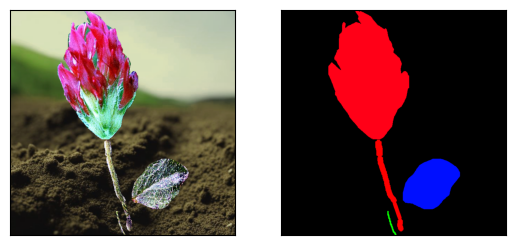

In [47]:
reset_random(148)
new_config = copy.deepcopy(default_config)
new_config['augmentations_config_path'] = './configs/augmentation_config_strong.py'

pipeline = Pipeline(
    project_config=new_config,
    feature_sampler_limitations=default_feature_sampler_limitations,
    verbose=0
)

pipeline.augmentor.augmentation_config['aug_list'] = [
    {
        'target': ['object_part'],
        'terminate': False,
        'apply_to_classes': 'all',
        'apply_to_object_types': 'all',
        'apply_to_tags': 'all',
        'exclude_classes': [],
        'exclude_object_types': [],
        'exclude_tags': [],
        'pipeline': A.Compose([
            A.Equalize(always_apply=True, p=1),
        ], p=1.0, is_check_shapes=True)
    },
    {
        'target': ['background'],
        'terminate': False,
        'apply_to_classes': 'all',
        'apply_to_object_types': [part_type2num['flower']],
        'apply_to_tags': 'all',
        'exclude_classes': [],
        'exclude_object_types': [],
        'exclude_tags': [],
        'pipeline': A.Compose([
            A.ColorJitter(always_apply=True, p=1),
        ], p=1.0, is_check_shapes=True)
    }
]

pipeline.prepare()

generated_scene, mask_part_list = pipeline.run(num_objects=1)
save_results(generated_scene, mask_part_list)
reset_random()

Другие варианты базовых аугментаций рекомендуется изучить в библиотеке [Albumentations](https://albumentations.ai/docs/). При желании наглядно увидеть что делает трансформация до ее применения, можно ознакомиться с [интерактивной версией](https://demo.albumentations.ai).